# MMSB: Simulations

In [1]:
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import mmsb
import utils

%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.debugger import Tracer
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

## Simulation 0: Toy graph

In [6]:
K = 2
V = 4
N = 100
B_ = utils.make_B(K, probs=[.9])
X, pi = utils.gen_data(B_, V, N, alpha=0.05)
print pi
pd.DataFrame(utils.get_interactions(X, V))

[[  6.69906147e-19   1.00000000e+00]
 [  6.61951879e-03   9.93380481e-01]
 [  9.99999917e-01   8.32279716e-08]
 [  9.23238731e-01   7.67612692e-02]]


,0,1,2,3
0,0,9,1,1
1,10,0,1,3
2,20,8,0,12
3,10,13,12,0


0:00:00.343658


(-53.460924601523836, -53.460924601523836)

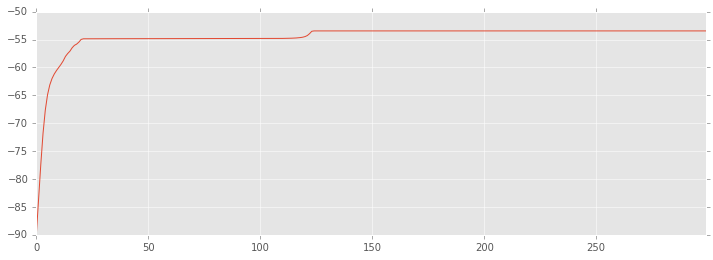

In [7]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

### Pi (prototype distributions)

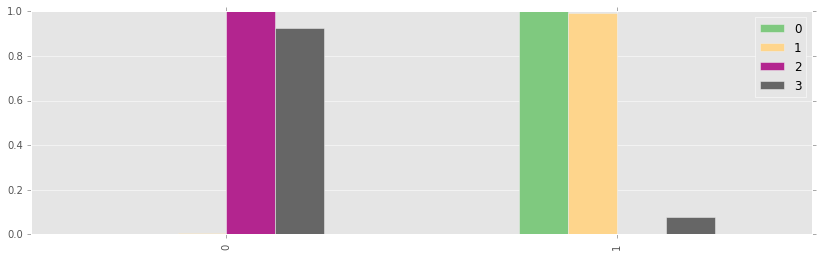

In [8]:
pd.DataFrame(pi).T.plot(kind='bar', cmap='Accent', figsize=[14,4])

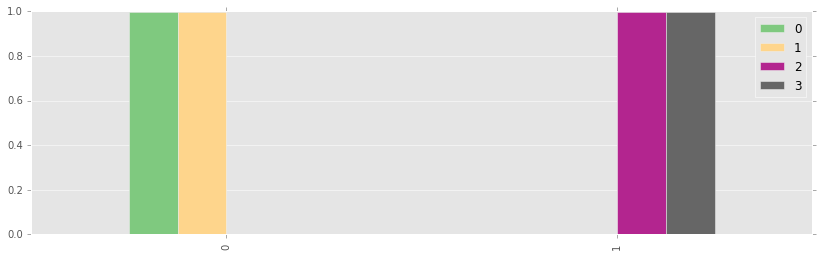

In [9]:
pd.DataFrame(gamma).plot(kind='bar', cmap='Accent', figsize=[14,4])

In [10]:
pd.DataFrame(B)

,0,1
0,0.500000,0.105263
1,0.894737,0.500000


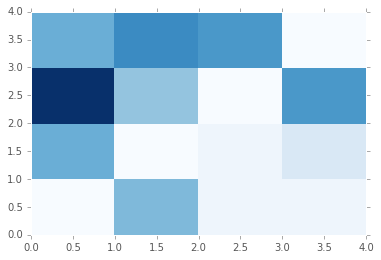

In [13]:
I = pd.DataFrame(utils.get_interactions(X, V))
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')

## Simulation I: Small graph

In [14]:
K = 4
V = 10
N = 10000
B_ = utils.make_B(K, probs=[.2])
X, pi = utils.gen_data(B_, V, N, alpha=0.1)

In [15]:
print pi
pd.DataFrame(utils.get_interactions(X, V))

[[  1.31765035e-04   1.18099707e-12   9.99868235e-01   2.11609876e-14]
 [  1.95628067e-08   7.20061134e-01   2.78463122e-01   1.47572398e-03]
 [  6.91670248e-02   1.42050097e-02   2.96667926e-03   9.13661286e-01]
 [  1.28754484e-02   5.91670867e-18   9.82315900e-01   4.80865201e-03]
 [  5.25345466e-04   6.57203224e-02   4.26534532e-06   9.33750067e-01]
 [  9.99891021e-01   4.75443105e-12   1.08979000e-04   3.35355306e-18]
 [  7.57649375e-02   3.47768062e-05   9.11067940e-01   1.31323457e-02]
 [  5.13938118e-08   1.24814308e-08   9.99999936e-01   5.95022821e-10]
 [  5.18807709e-01   4.78948327e-01   2.24394998e-03   1.35797924e-08]
 [  2.60335064e-01   3.06373341e-03   7.33342833e-01   3.25836929e-03]]


,0,1,2,3,4,5,6,7,8,9
0,0,169,38,95,59,164,102,116,178,120
1,49,0,59,82,58,164,76,59,155,100
2,185,155,0,146,106,186,186,149,192,172
3,118,137,49,0,61,172,123,97,186,143
4,158,172,113,176,0,193,160,166,178,199
5,45,40,57,43,40,0,42,35,81,60
6,121,146,43,111,55,162,0,109,153,125
7,113,170,58,100,57,203,113,0,173,110
8,39,72,51,48,42,126,53,45,0,74
9,93,147,53,76,49,161,108,97,180,0


0:00:15.909325


(-5945.6188505818536, -5945.6188505818536)

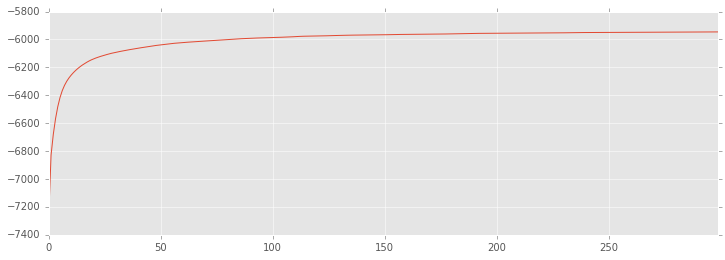

In [16]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

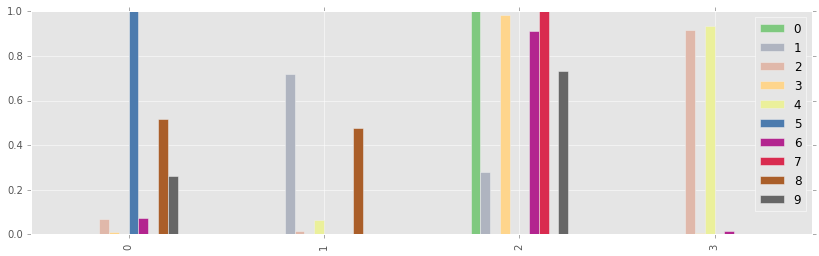

In [17]:
pd.DataFrame(pi).T.plot(kind='bar', cmap='Accent', figsize=[14,4])

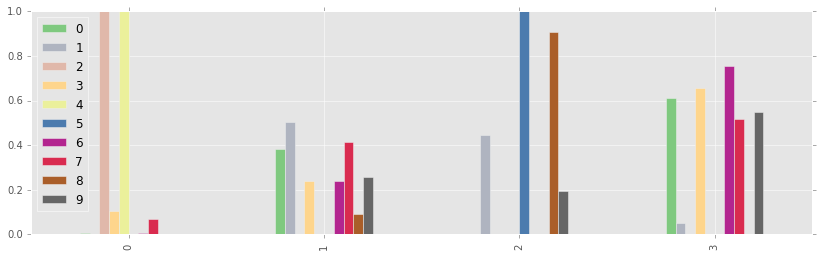

In [18]:
pd.DataFrame(gamma).plot(kind='bar', cmap='Accent', figsize=[14,4])

In [19]:
pd.DataFrame(B).round(6)

,0,1,2,3
0,0.500000,0.739082,0.802956,0.785660
1,0.260918,0.500000,0.849319,0.463153
2,0.197044,0.150681,0.500000,0.198388
3,0.214340,0.536847,0.801612,0.500000


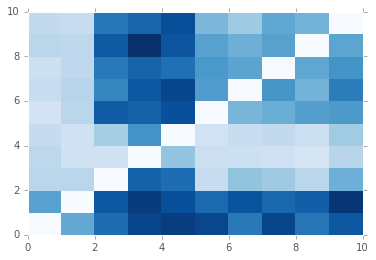

In [20]:
I = pd.DataFrame(utils.get_interactions(X, V))
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')

## Simulation II: Medium graph

In [21]:
K = 4
V = 100
N = 10000
B_ = utils.make_B(K, probs=[.9])
X, pi = utils.gen_data(B_, V, N, alpha=0.05)

0:00:30.008116


(-5084.8131093946949, -5084.8131093946949)

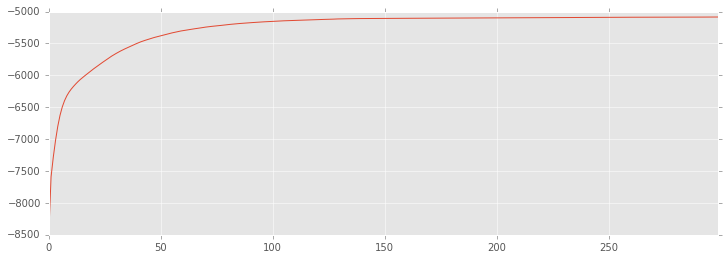

In [22]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

### Interaction matrix

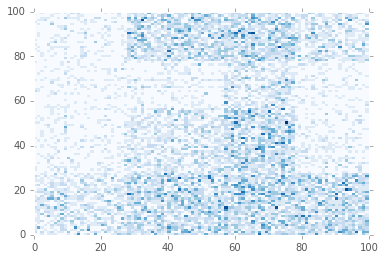

In [23]:
I = pd.DataFrame(utils.get_interactions(X, V))
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')

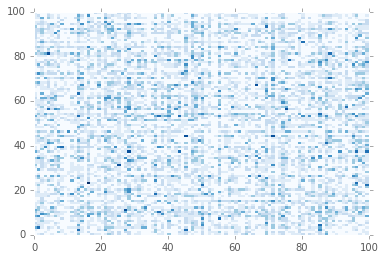

In [24]:
plt.pcolor(I, cmap='Blues')

## Simulation III: Large graph

In [25]:
K = 10
V = 300
N = 10000
B_ = utils.make_B(K, probs=[.9])
X, pi = utils.gen_data(B_, V, N, alpha=0.05)

0:02:41.704295


(-6951.3741264375021, -6951.3741264375021)

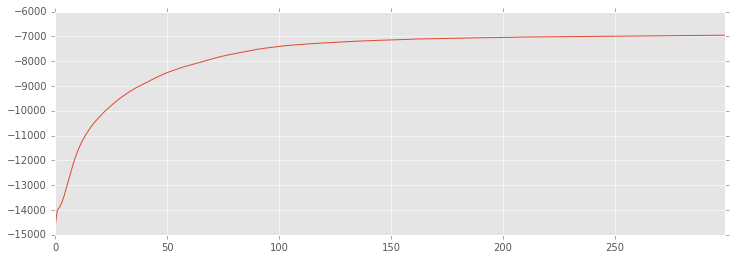

In [26]:
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

### Interaction matrix

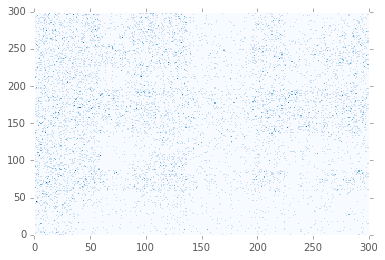

In [27]:
I = pd.DataFrame(utils.get_interactions(X, V))
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')